In [493]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Exploration of data

In [494]:
df=pd.read_csv('Wage.csv')

In [495]:
df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [496]:
df.tail(10)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
2990,2009,50,1. Male,2. Married,2. Black,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.886491,132.487821
2991,2003,26,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.778151,118.884359
2992,2007,35,1. Male,2. Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.698970,109.833986
2993,2006,31,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.633468,102.870247
2994,2009,31,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.893207,133.380608
2995,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033
2999,2009,55,1. Male,5. Separated,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.505150,90.481913


### we will remove logwage which appears to be redundant and we will check it again in (transformatiom of data)

In [497]:
df.drop(columns=['logwage'],inplace=True)

In [498]:
df.shape

(3000, 11)

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  wage        3000 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 257.9+ KB


# check duplicates

In [500]:
df=df.drop_duplicates()

In [501]:
df.shape

(2997, 11)

# checking data types

In [502]:
df.dtypes

year            int64
age             int64
sex            object
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
wage          float64
dtype: object

#### look if we can change any (object type) to (category) because that is more memory-efficient 

In [503]:
for i in range(2,10):
    print(df.iloc[:,i].unique())
    print()

['1. Male']

['1. Never Married' '2. Married' '4. Divorced' '3. Widowed' '5. Separated']

['1. White' '3. Asian' '4. Other' '2. Black']

['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']

['2. Middle Atlantic']

['1. Industrial' '2. Information']

['1. <=Good' '2. >=Very Good']

['2. No' '1. Yes']



#### we can make this for the last 3 columns 

In [504]:
for i in range(7,10):
     df.iloc[:,i]=df.iloc[:,i].astype('category')

In [505]:
df.dtypes

year             int64
age              int64
sex             object
maritl          object
race            object
education       object
region          object
jobclass      category
health        category
health_ins    category
wage           float64
dtype: object

# Summary statistics of Data

In [506]:
df.describe(include='all')

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,wage
count,2997.000000,2997.000000,2997,2997,2997,2997,2997,2997,2997,2997,2997.000000
unique,NaN,NaN,1,5,4,5,1,2,2,2,NaN
top,NaN,NaN,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,NaN
freq,NaN,NaN,2997,2071,2477,971,2997,1544,2139,2080,NaN
mean,2005.792125,42.412412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.626947
std,2.026155,11.546884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.626146
min,2003.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.085537
25%,2004.000000,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.383940
50%,2006.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.921507
75%,2008.000000,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.680488


# missing value

In [507]:
df.isnull().sum()

year          0
age           0
sex           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
wage          0
dtype: int64

# outliers 

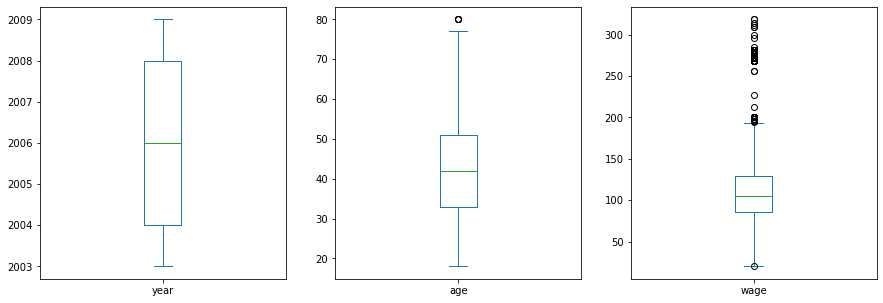

In [508]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
df['year'].plot(kind='box',ax=axes[0])
df['age'].plot(kind='box',ax=axes[1])
df['wage'].plot(kind='box',ax=axes[2])
plt.show()

#### so we have outliers in age and wage 

### age

In [509]:
df.shape[0]

2997

In [510]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
Iqr=Q3-Q1
lc=Q1-(1.5*Iqr)
uc=Q3+(1.5*Iqr)

In [511]:
df[( df['age'] < lc)|(df['age'] > uc)].reset_index(drop=True)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,wage
0,2003,80,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,79.854900
1,2003,80,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,94.072715
2,2005,80,1. Male,1. Never Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,87.981033
3,2003,80,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,82.679637


In [512]:
df=df[( df['age'] > lc) & (df['age'] < uc)] 

In [513]:
df.shape[0]

2993

### wage

In [514]:
Q1=df['wage'].quantile(0.25)
Q3=df['wage'].quantile(0.75)
Iqr=Q3-Q1
lc=Q1-(1.5*Iqr)
uc=Q3+(1.5*Iqr)

In [515]:
df[(df['wage']<lc)|(df['wage']>uc)].reset_index(drop=True)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,wage
0,2006,50,1. Male,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,212.842352
1,2003,38,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,200.543262
2,2005,49,1. Male,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,277.601418
3,2004,55,1. Male,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,195.676308
4,2009,35,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,267.901087
...,...,...,...,...,...,...,...,...,...,...,...
104,2003,55,1. Male,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,268.266292
105,2009,37,1. Male,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,267.901087
106,2007,61,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,281.745971
107,2003,40,1. Male,2. Married,3. Asian,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,299.262977


In [516]:
df=df[(df['wage']>lc) & (df['wage']<uc)]

In [517]:
df.shape[0]

2884

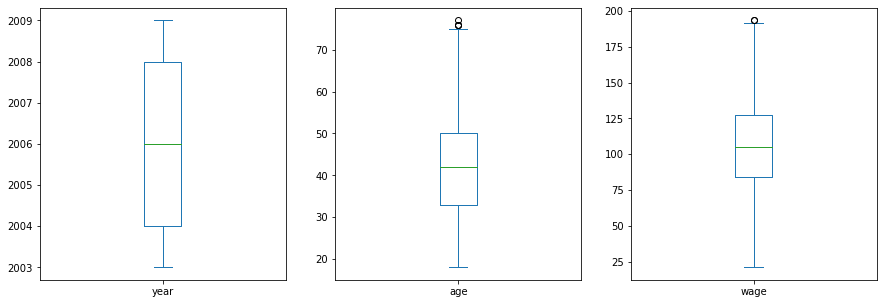

In [518]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
df['year'].plot(kind='box',ax=axes[0])
df['age'].plot(kind='box',ax=axes[1])
df['wage'].plot(kind='box',ax=axes[2])
plt.show()

# transformatiom and scaling

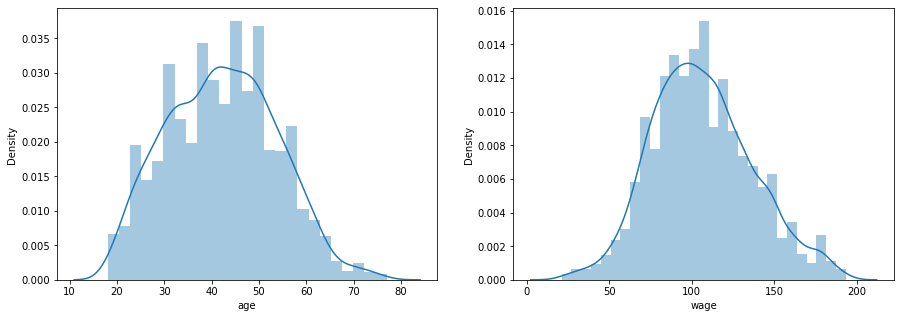

In [519]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['age'],ax=axes[0])
sns.distplot(df['wage'],ax=axes[1])
plt.show()

### age

In [520]:
df.age.skew()

0.12885664096291458

In [521]:
age_mean=df['age'].mean()
age_std=df['age'].std()
age_min=df['age'].min()
age_max=df['age'].max()

In [522]:
df['sqrtage']=df['age']**0.5
df['logage']=np.log(df['age'])
df['z_age']=(df['age']-age_mean)/age_std
df['min_max_age']=(df['age']-age_min)/(age_max-age_min)

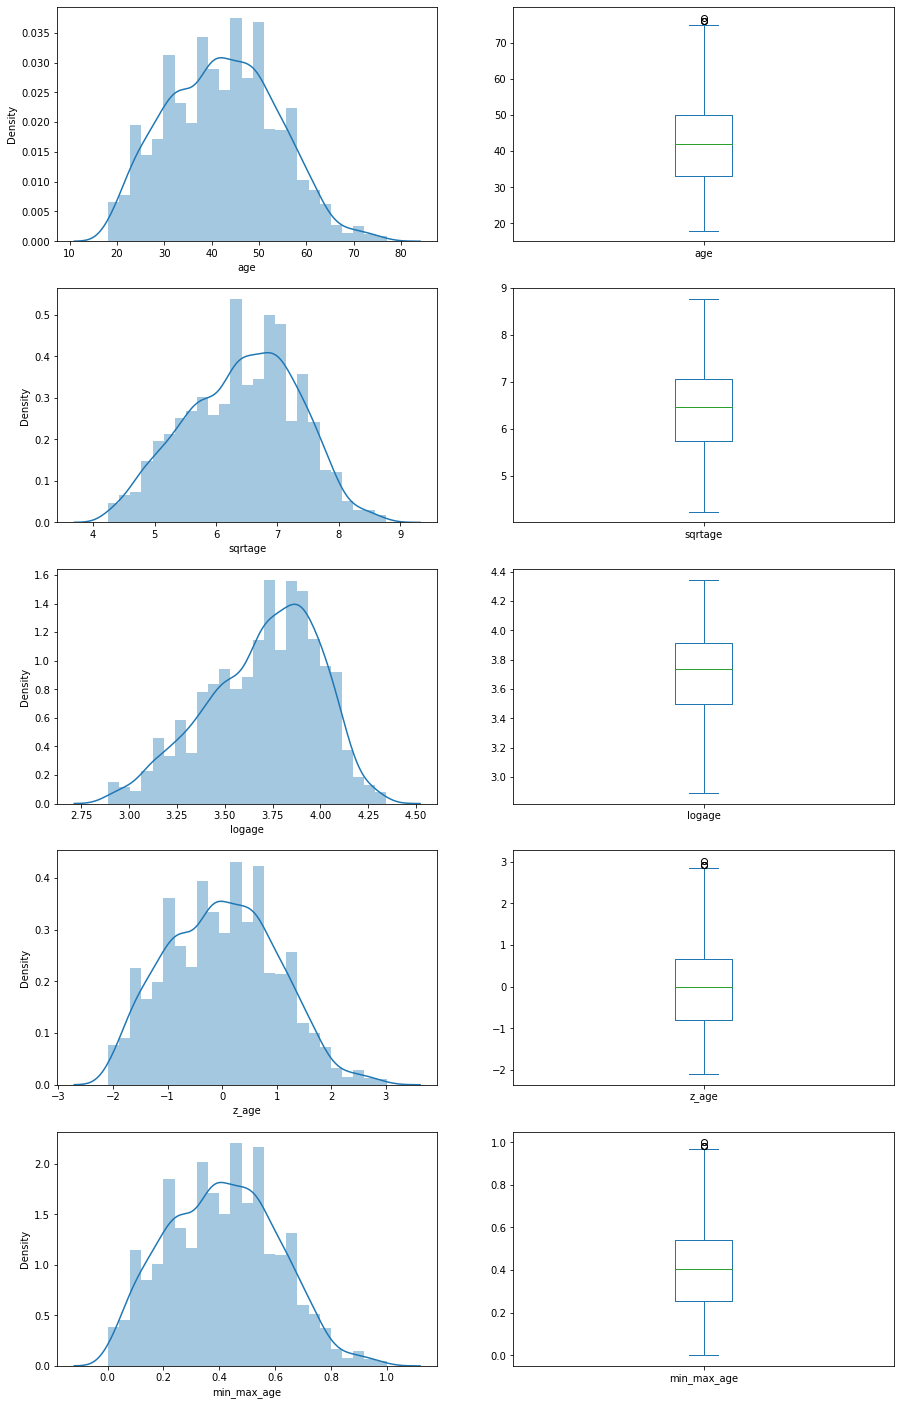

In [523]:
fig,axes=plt.subplots(5,2,figsize=(15,25))

sns.distplot(df['age'],ax=axes[0,0])
df['age'].plot(kind='box',ax=axes[0,1])

sns.distplot(df['sqrtage'],ax=axes[1,0])
df['sqrtage'].plot(kind='box',ax=axes[1,1])

sns.distplot(df['logage'],ax=axes[2,0])
df['logage'].plot(kind='box',ax=axes[2,1])

sns.distplot(df['z_age'],ax=axes[3,0])
df['z_age'].plot(kind='box',ax=axes[3,1])

sns.distplot(df['min_max_age'],ax=axes[4,0])
df['min_max_age'].plot(kind='box',ax=axes[4,1])

plt.show()

In [524]:
print(df.age.skew())
print(df.sqrtage.skew())
print(df.logage.skew())
print(df.z_age.skew())
print(df.min_max_age.skew())

0.12885664096291458
-0.1689942392976798
-0.47319297679054684
0.1288566409629146
0.12885664096291471


#### age,z_age and min_max_age are well distributed and there is no problem in it we will choose age

In [525]:
df.drop(columns=['sqrtage','logage','z_age','min_max_age'],inplace=True)

In [526]:
df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.043154


### wage

In [527]:
df.wage.skew()

0.287373000449085

In [528]:
wage_mean=df['wage'].mean()
wage_std=df['wage'].std()
wage_min=df['wage'].min()
wage_max=df['wage'].max()

In [529]:
df['sqrtwage']=df['wage']**0.5
df['logwage']=np.log(df['wage'])
df['z_wage']=(df['wage']-wage_mean)/wage_std
df['min_max_wage']=(df['wage']-wage_min)/(wage_max-wage_min)

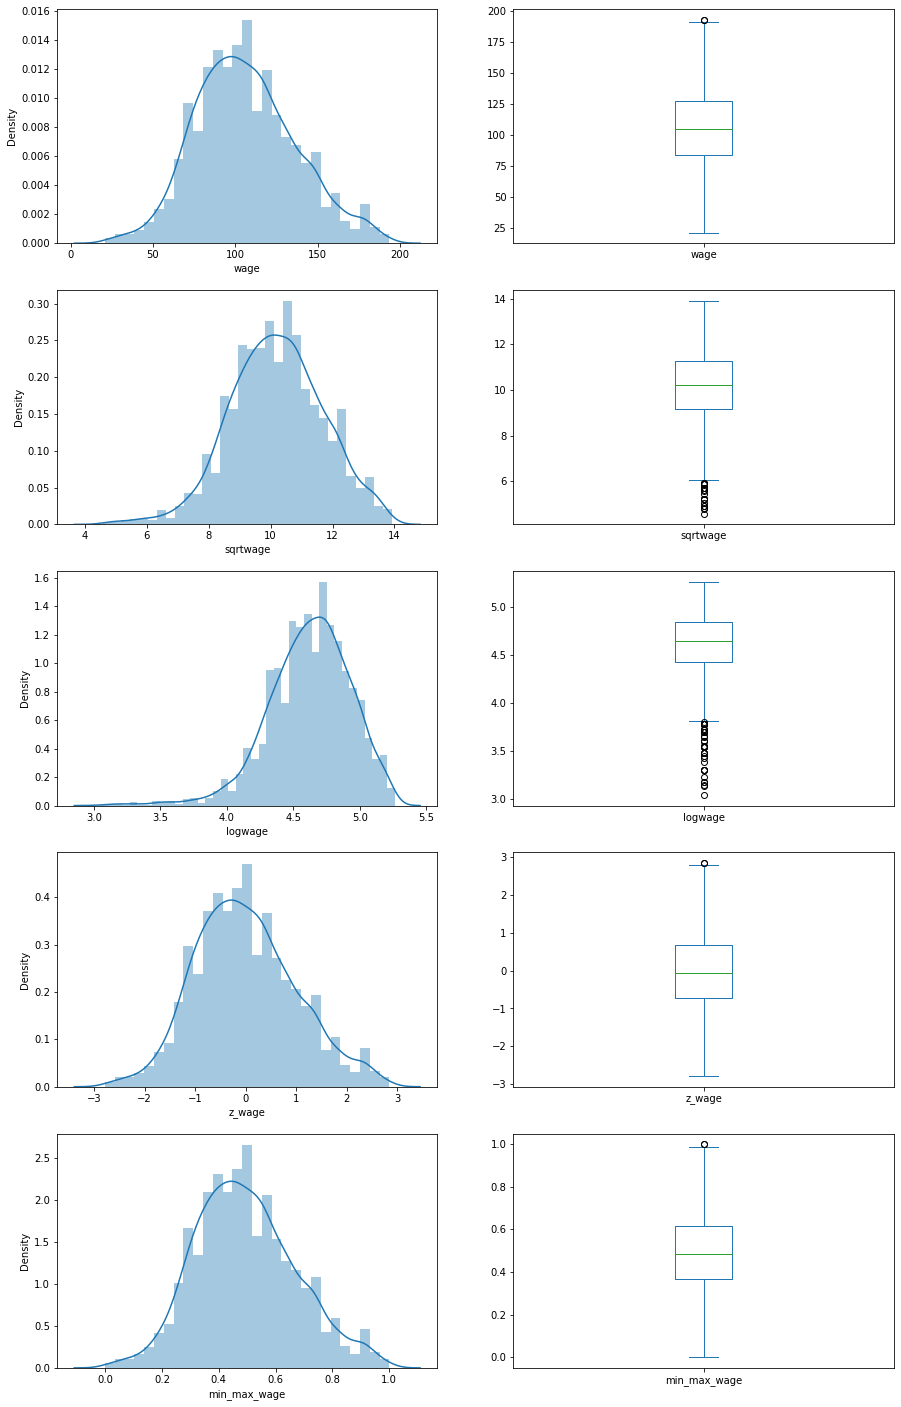

In [530]:
fig,axes=plt.subplots(5,2,figsize=(15,25))

sns.distplot(df['wage'],ax=axes[0,0])
df['wage'].plot(kind='box',ax=axes[0,1])

sns.distplot(df['sqrtwage'],ax=axes[1,0])
df['sqrtwage'].plot(kind='box',ax=axes[1,1])

sns.distplot(df['logwage'],ax=axes[2,0])
df['logwage'].plot(kind='box',ax=axes[2,1])

sns.distplot(df['z_wage'],ax=axes[3,0])
df['z_wage'].plot(kind='box',ax=axes[3,1])

sns.distplot(df['min_max_wage'],ax=axes[4,0])
df['min_max_wage'].plot(kind='box',ax=axes[4,1])

plt.show()

In [531]:
print(df.wage.skew())
print(df.sqrtwage.skew())
print(df.logwage.skew())
print(df.z_wage.skew())
print(df.min_max_wage.skew())

0.287373000449085
-0.16329923124875512
-0.7573386876287654
0.2873730004490856
0.2873730004490852


#### wage,z_wage and min_max_wage are well distributed and there is no problem in it we will choose wage

In [532]:
df.drop(columns=['sqrtwage','logwage','z_wage','min_max_wage'],inplace=True)

# Data now is clean

In [533]:
df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.043154


In [534]:
# Check for missing values
print(df.isnull().sum())
print()
# Check for duplicate values
print('duplicate in data : ',df.duplicated().sum())
print()
# Check data types and convert if necessary
print(df.dtypes)

year          0
age           0
sex           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
wage          0
dtype: int64

duplicate in data :  0

year             int64
age              int64
sex             object
maritl          object
race            object
education       object
region          object
jobclass      category
health        category
health_ins    category
wage           float64
dtype: object


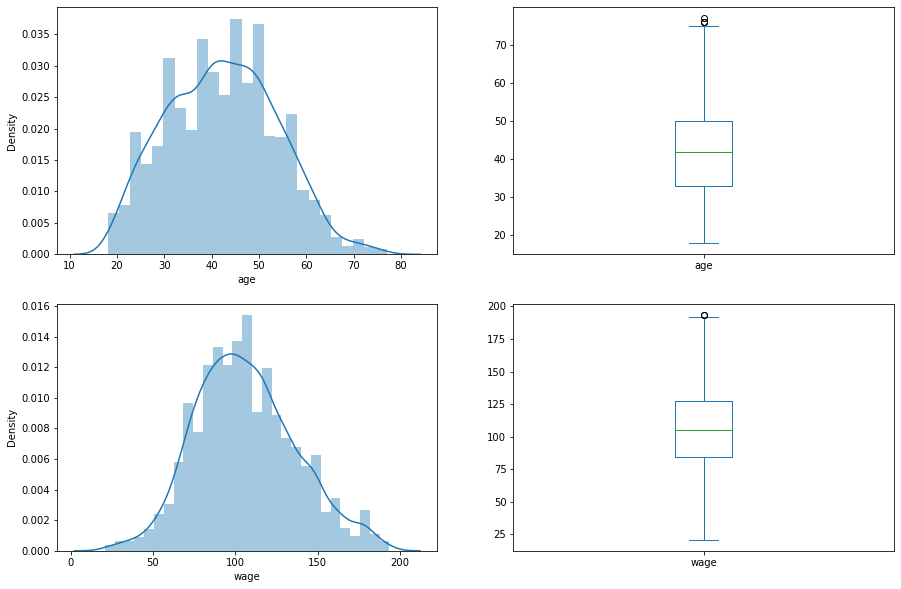

In [538]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.distplot(df['age'],ax=axes[0,0])
df['age'].plot(kind='box',ax=axes[0,1])
sns.distplot(df['wage'],ax=axes[1,0])
df['wage'].plot(kind='box',ax=axes[1,1])

plt.show()